In [1]:
import pandas as pd
import matplotlib.pyplot as ply
import numpy as np

In [2]:
# Reading the excel file into a dataframe with pandas
all_site = pd.read_excel('weather_data.xlsx')

In [3]:
all_site.shape

(83674, 17)

In [4]:
#To remove empty rows 
all_site = all_site.dropna()

In [5]:
all_site.shape

(41836, 17)

In [6]:
#selecting only Data for HOLL Site
holl_site = all_site[all_site['STID'] == 'HOLL']
holl_site.shape

(10459, 17)

In [7]:
#selecting only data for IDAB site
idab_site = all_site[all_site['STID'] == 'IDAB']
idab_site.shape

(10459, 17)

In [8]:
#selecting only data for KENT site
kent_site = all_site[all_site['STID'] == 'KENT']
kent_site.shape

(10459, 17)

In [9]:
#selecting only data for MIAM site
miam_site = all_site[all_site['STID'] == 'MIAM']
miam_site.shape

(10459, 17)

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

In [12]:
x = float(1994)
y = float(2022)

In [14]:
#Trying to replace -996 degrees with 0
#df['column name'] = df['column name'].replace(['old value'],'new value')
holl2 = holl_site
holl2['TMAX']=holl2['TMAX'].replace(-996.00, 0)
holl2.head

C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3984065176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holl2['TMAX']=holl2['TMAX'].replace(-996.00, 0)


<bound method NDFrame.head of        YEAR  MONTH   DAY  STID   TMAX    TMIN    TAVG    DMAX    DMIN    DAVG  \
1      1994    1.0   1.0  HOLL   0.00 -996.00 -996.00 -996.00 -996.00 -996.00   
9      1994    1.0   2.0  HOLL   0.00 -996.00 -996.00 -996.00 -996.00 -996.00   
17     1994    1.0   3.0  HOLL   0.00 -996.00 -996.00 -996.00 -996.00 -996.00   
25     1994    1.0   4.0  HOLL   0.00 -996.00 -996.00 -996.00 -996.00 -996.00   
33     1994    1.0   5.0  HOLL   0.00 -996.00 -996.00 -996.00 -996.00 -996.00   
...     ...    ...   ...   ...    ...     ...     ...     ...     ...     ...   
83633  2022    8.0  16.0  HOLL  99.57   71.80   87.84   65.70   54.99   59.00   
83641  2022    8.0  17.0  HOLL  94.48   72.54   81.76   66.18   61.20   64.28   
83649  2022    8.0  18.0  HOLL  94.05   68.22   78.96   68.26   51.57   60.42   
83657  2022    8.0  19.0  HOLL  96.06   65.30   80.64   67.44   49.15   56.85   
83665  2022    8.0  20.0  HOLL  92.86   68.34   77.48   68.76   54.14   63.18  

#### Below is what I used to replace -996.00 to 0 in holl rows

In [16]:
holl2['TMIN'] = holl2['TMIN'].replace(-996.00, 0)
holl2['TAVG'] = holl2['TAVG'].replace(-996.00, 0)
holl2['DMAX'] = holl2['DMAX'].replace(-996.00, 0)
holl2['DMIN'] = holl2['DMIN'].replace(-996.00, 0)
holl2['DAVG'] = holl2['DAVG'].replace(-996.00, 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3520365985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holl2['TMIN'] = holl2['TMIN'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3520365985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holl2['TAVG'] = holl2['TAVG'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3520365985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

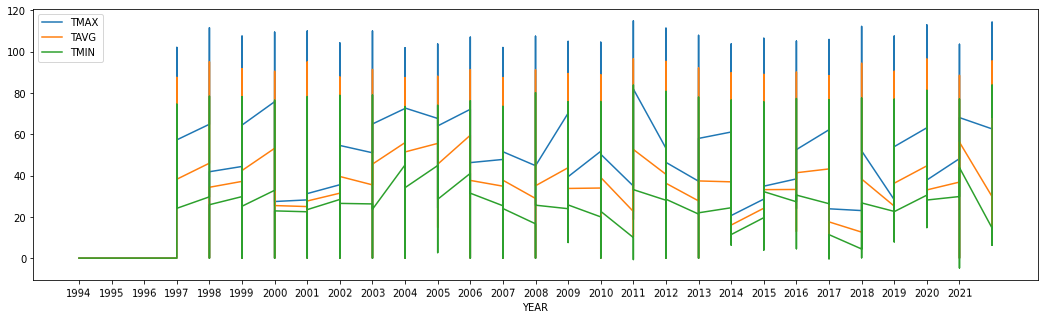

In [17]:
holl2.plot(x="YEAR", y=["TMAX", "TAVG", "TMIN"], figsize=(18,5))
plt.xticks(range(1994,2022),rotation=1)
plt.show()

#### The above plot is too condensed so I will group the data

In [18]:
# Return a new column grouping values 
# df.groupby('A')['B'].mean() # group by A and return values of B
group1 = holl2.groupby('MONTH')['TMAX'].mean()

The pandas series "group1" is showing TMAX grouped Monthly, meaning the TMAX displayed is the average TMAX for each month

In [19]:
# So now to do a month list that I can use to plot against average TMAX to show how it reflects monthly
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [20]:
group1 = group1.to_frame()

In [21]:
type(group1)

pandas.core.frame.DataFrame

In [22]:
#Adding a new column to end of dataframe
group1 = group1.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [23]:
print(group1)

            TMAX     Months
MONTH                      
1.0    46.826563    January
2.0    49.036886   February
3.0    60.144828      March
4.0    66.375747      April
5.0    75.441746        May
6.0    82.860046       June
7.0    87.015940       July
8.0    85.865698     August
9.0    78.726083  September
10.0   67.577811    October
11.0   57.566679   November
12.0   48.489735   December


Grouping TMIN and TAVG by Month, so I can plot them all in a single chart and easily understand the behaviour

In [24]:
group_tmin = holl2.groupby('MONTH')['TMIN'].mean()
group_tavg = holl2.groupby('MONTH')['TAVG'].mean()
#Then convert the created panda series to dataframe 
group_tmin = group_tmin.to_frame()
group_tavg = group_tavg.to_frame()
print(group_tmin, group_tavg)

            TMIN
MONTH           
1.0    22.279210
2.0    24.843101
3.0    34.178988
4.0    41.061805
5.0    51.279110
6.0    59.719115
7.0    63.019655
8.0    61.807005
9.0    54.900464
10.0   43.210219
11.0   32.781488
12.0   24.776613             TAVG
MONTH           
1.0    33.583982
2.0    36.270098
3.0    46.795551
4.0    53.692287
5.0    63.207976
6.0    71.111115
7.0    74.908220
8.0    73.290495
9.0    66.188321
10.0   54.751302
11.0   44.401167
12.0   35.693387


NOW TO ADD THE TMIN AND TAVG GROUPED MONTHLY TO OUR GROUP 1 DATAFRAME THAT HAS TMAX

In [25]:
#numbers = df2["Numbers"]
#df1 = df1.join(numbers)
tmin = group_tmin["TMIN"]
group1 = group1.join(tmin)
tavg = group_tavg["TAVG"]
group1 = group1.join(tavg)

In [26]:
print(group1)

            TMAX     Months       TMIN       TAVG
MONTH                                            
1.0    46.826563    January  22.279210  33.583982
2.0    49.036886   February  24.843101  36.270098
3.0    60.144828      March  34.178988  46.795551
4.0    66.375747      April  41.061805  53.692287
5.0    75.441746        May  51.279110  63.207976
6.0    82.860046       June  59.719115  71.111115
7.0    87.015940       July  63.019655  74.908220
8.0    85.865698     August  61.807005  73.290495
9.0    78.726083  September  54.900464  66.188321
10.0   67.577811    October  43.210219  54.751302
11.0   57.566679   November  32.781488  44.401167
12.0   48.489735   December  24.776613  35.693387


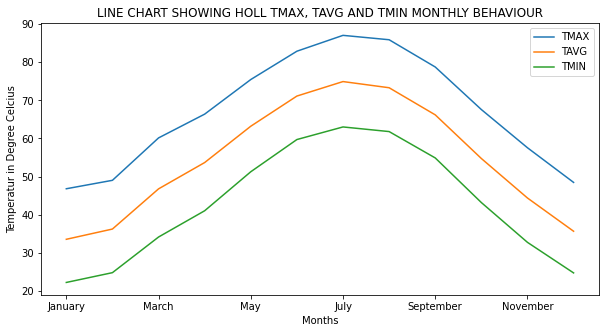

In [27]:
group1.plot(x='Months', y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING HOLL TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

THEN FOR YEARLY BEHAVIOUR OF TMAX, TMIN AND TAVG IN HOLL, WE WILL GROUP THE VALUES BY YEAR

In [28]:
year_group_tmin = holl2.groupby('YEAR')['TMIN'].mean()
year_group_tmax = holl2.groupby('YEAR')['TMAX'].mean()
year_group_tavg = holl2.groupby('YEAR')['TAVG'].mean()
# Convert each series to dataframe
year_group_tmin = year_group_tmin.to_frame()
year_group_tmax = year_group_tmax.to_frame()
year_group_tavg = year_group_tavg.to_frame()

MERGING THE THREE DATAFRAME OF TMIN, TMAX AND TAVG YEARLY GROUP INTO ONE DATAFRAME

In [29]:
year_group_holl = pd.merge(year_group_tmin, year_group_tmax, left_index=True, right_index=True)

In [30]:
year_group_holl = pd.merge(year_group_holl, year_group_tavg, left_index=True, right_index=True)

In [31]:
print(type(year_group_holl))

<class 'pandas.core.frame.DataFrame'>


NOW TO PLOT THE TMIN, TMAX AND TAVG AGAINST THE YEAR FOR HOLL SITE

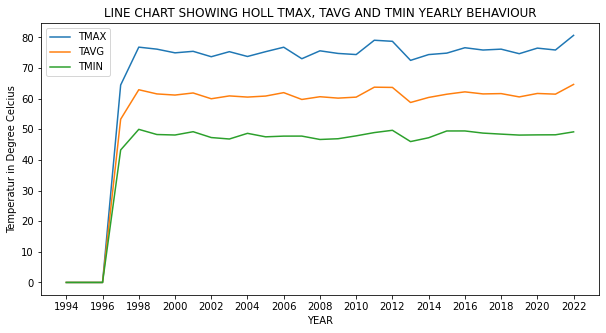

In [32]:
year_group_holl.plot(use_index=True, y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING HOLL TMAX, TAVG AND TMIN YEARLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

NOW LET'S LOOK AT THE PRECIPITATION IN HOLL CITY

In [33]:
# First I will group the precipitation monthly
holl_month_rain = holl2.groupby('MONTH')['RAIN'].mean()
# Then I will group the precipitation yearly
holl_year_rain = holl2.groupby('YEAR')['RAIN'].mean()

In [34]:
# Convert both series to dataframe
holl_month_rain = holl_month_rain.to_frame()
holl_year_rain = holl_year_rain.to_frame()

In [35]:
# Add a Months column to the holl_month_rain dataframe
holl_month_rain = holl_month_rain.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

PLOT OF HOLL SITE MONTHLY RAIN AVERAGE

In [36]:
holl_month_rain

,RAIN,Months
MONTH,,
1.0,-24.423860,January
2.0,0.033028,February
3.0,-18.841123,March
4.0,-34.368552,April
5.0,-2.110300,May
6.0,0.113161,June
7.0,0.066774,July
8.0,-33.662770,August
9.0,-35.599667,September


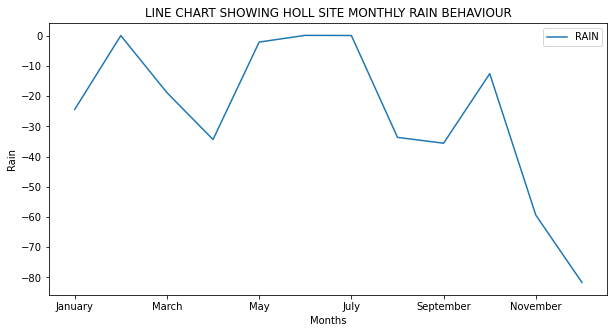

In [37]:
holl_month_rain.plot(x='Months', y='RAIN', figsize=(10,5), title="LINE CHART SHOWING HOLL SITE MONTHLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

PLOT OF HOLL SITE YEARLY RAIN BEHAVIOUR

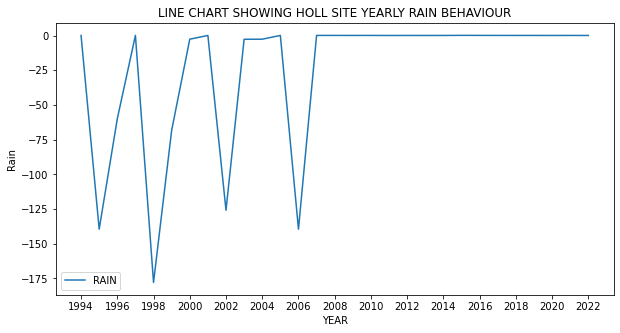

In [38]:
holl_year_rain.plot(use_index=True, y='RAIN', figsize=(10,5), title="LINE CHART SHOWING HOLL SITE YEARLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

# NOW LET'S WORK WITH IDAB SITE

In [39]:
# First change all -996.0 values to 0
idab2 = idab_site
idab2['TMAX'] = idab2['TMAX'].replace(-996.00, 0)
idab2['TMIN'] = idab2['TMIN'].replace(-996.00, 0)
idab2['TAVG'] = idab2['TAVG'].replace(-996.00, 0)
idab2['DMAX'] = idab2['DMAX'].replace(-996.00, 0)
idab2['DMIN'] = idab2['DMIN'].replace(-996.00, 0)
idab2['DAVG'] = idab2['DAVG'].replace(-996.00, 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_23232\487423265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idab2['TMAX'] = idab2['TMAX'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\487423265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idab2['TMIN'] = idab2['TMIN'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\487423265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [40]:
# To Group idab site temperature values monthly
idab_tmin = idab2.groupby('MONTH')['TMIN'].mean()
idab_tavg = idab2.groupby('MONTH')['TAVG'].mean()
idab_tmax = idab2.groupby('MONTH')['TMAX'].mean()
# Then convert grouped series to dataframe
idab_tmin = idab_tmin.to_frame()
idab_tavg = idab_tavg.to_frame()
idab_tmax = idab_tmax.to_frame()

In [41]:
# To add TMIN and TAVG to our TMAX dataframe 
tmin = idab_tmin["TMIN"]
idab_tmax = idab_tmax.join(tmin)
tavg = idab_tavg["TAVG"]
idab_tmax = idab_tmax.join(tavg)

In [42]:
# So now idab_tmax contains tmax, tmin and tavg for Idab site
print(idab_tmax)

            TMAX       TMIN       TAVG
MONTH                                 
1.0    46.920823  27.251802  36.860400
2.0    49.129219  29.930830  39.522589
3.0    59.250968  38.649032  49.079700
4.0    65.315471  44.879149  55.380379
5.0    72.821568  53.809566  63.201980
6.0    79.731437  61.118195  70.037529
7.0    83.417319  63.431190  72.822481
8.0    83.796779  62.862534  72.469966
9.0    77.605167  56.317298  66.137774
10.0   67.083710  45.112465  55.440000
11.0   58.155798  36.558881  46.959202
12.0   49.959505  29.935265  39.652972


In [43]:
# Let us add the months that will be used as our x-axis in our plot
idab_tmax = idab_tmax.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

NOW WITH OUR IDAB DF WE CAN PLOT TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR IN IDAB

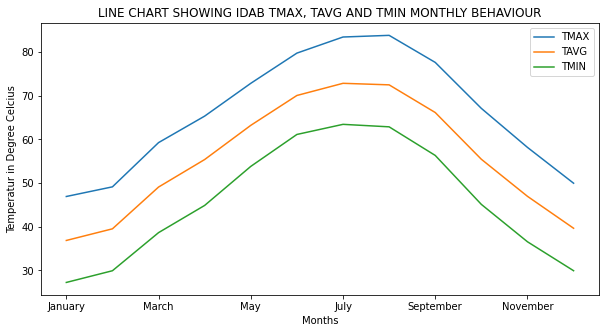

In [44]:
idab_tmax.plot(x='Months', y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING IDAB TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

FROM THE PLOT FOR IDAB ABOVE, I CAN SEE THAT THE MAXIMUM TEMPERATURE FOR HOLL IS GREATER THAN WHAT WE EXPERIENCE AT IDAB

LET'S HANDLE THE TEMPERATURE YEARLY BEHAVIOUR IN IDAB

In [45]:
# First group the temperature values according to the year
idab_year_group_tmin = idab2.groupby('YEAR')['TMIN'].mean()
idab_year_group_tmax = idab2.groupby('YEAR')['TMAX'].mean()
idab_year_group_tavg = idab2.groupby('YEAR')['TAVG'].mean()
# Convert each series to dataframe
idab_year_group_tmin = idab_year_group_tmin.to_frame()
idab_year_group_tmax = idab_year_group_tmax.to_frame()
idab_year_group_tavg = idab_year_group_tavg.to_frame()
# Then we merge the three dataframes into one
year_group_idab = pd.merge(idab_year_group_tmin, idab_year_group_tmax, left_index=True, right_index=True)
year_group_idab = pd.merge(year_group_idab, idab_year_group_tavg, left_index=True, right_index=True)

In [46]:
year_group_idab

,TMIN,TMAX,TAVG
YEAR,,,
1994,0.000000,0.000000,0.000000
1995,0.000000,0.000000,0.000000
1996,0.000000,0.000000,0.000000
1997,44.909233,63.610986,53.920274
1998,54.006822,76.541315,65.000658
1999,51.324384,76.150027,63.352932
2000,51.119044,73.660902,62.088197
2001,51.988219,73.664356,62.353479
2002,51.431726,73.629260,62.036082


NOW TO PLOT THE TMIN, TMAX AND TAVG AGAINST THE YEAR FOR IDAB SITE

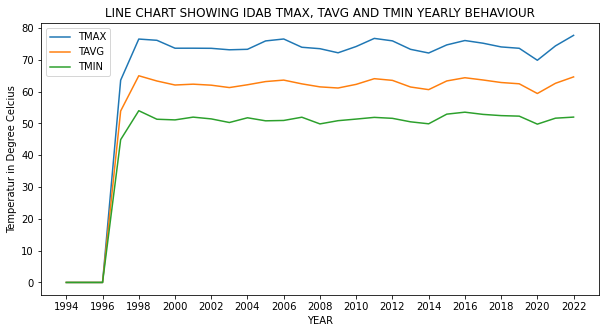

In [47]:
year_group_idab.plot(use_index=True, y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING IDAB TMAX, TAVG AND TMIN YEARLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

FROM THE ABOVE PLOT, I CAN SEE THAT THE TEMPERATURE DROP HOLL SITE EXPERIENCED IN 2013 IS WHAT IDAB EXPERIENCED IN 2015

NOW TO LOOK AT THE PRECIPITATION IN IDAB SITE

In [48]:
# First I will group the precipitation monthly
idab_month_rain = idab2.groupby('MONTH')['RAIN'].mean()
# Then I will group the precipitation yearly
idab_year_rain = idab2.groupby('YEAR')['RAIN'].mean()
# Convert both series to dataframe
idab_month_rain = idab_month_rain.to_frame()
idab_year_rain = idab_year_rain.to_frame()
# Add a Months column to the holl_month_rain dataframe
idab_month_rain = idab_month_rain.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

PLOT OF IDAB MONTHLY RAINFALL OVER THE YEARS

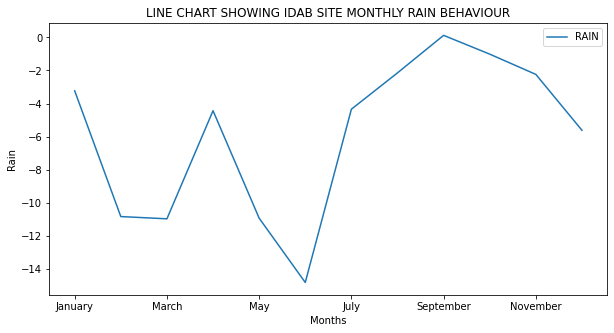

In [49]:
idab_month_rain.plot(x='Months', y='RAIN', figsize=(10,5), title="LINE CHART SHOWING IDAB SITE MONTHLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

BETWEEN MAY AND JULY IS WHEN HOLL SAW IT'S HIGHEST RAINFALL AND IT IS WHERE IDAB SAW IT'S LOWEST RAINFALL

PLOT OF IDAB SITE YEARLY RAIN BEHAVIOUR

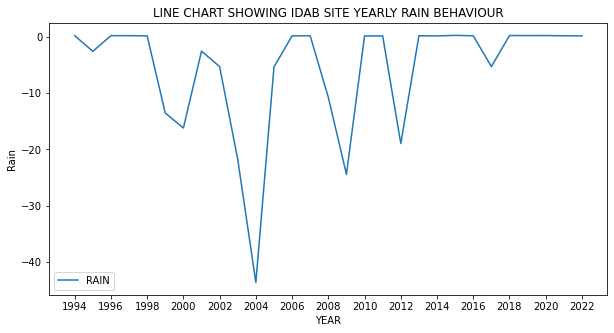

In [50]:
idab_year_rain.plot(use_index=True, y='RAIN', figsize=(10,5), title="LINE CHART SHOWING IDAB SITE YEARLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

# NOW LET'S WORK WITH KENT SITE

In [51]:
# First change all -996.0 values to 0
kent2 = kent_site
kent2['TMAX'] = kent2['TMAX'].replace(-996.00, 0)
kent2['TMIN'] = kent2['TMIN'].replace(-996.00, 0)
kent2['TAVG'] = kent2['TAVG'].replace(-996.00, 0)
kent2['DMAX'] = kent2['DMAX'].replace(-996.00, 0)
kent2['DMIN'] = kent2['DMIN'].replace(-996.00, 0)
kent2['DAVG'] = kent2['DAVG'].replace(-996.00, 0)

# To Group idab site temperature values monthly
kent_tmin = kent2.groupby('MONTH')['TMIN'].mean()
kent_tavg = kent2.groupby('MONTH')['TAVG'].mean()
kent_tmax = kent2.groupby('MONTH')['TMAX'].mean()
# Then convert grouped series to dataframe
kent_tmin = kent_tmin.to_frame()
kent_tavg = kent_tavg.to_frame()
kent_tmax = kent_tmax.to_frame()

# To add TMIN and TAVG to our TMAX dataframe 
tmin = kent_tmin["TMIN"]
kent_tmax = kent_tmax.join(tmin)
tavg = kent_tavg["TAVG"]
kent_tmax = kent_tmax.join(tavg)

# Let us add the months that will be used as our x-axis in our plot
kent_tmax = kent_tmax.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23232\2843934140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kent2['TMAX'] = kent2['TMAX'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\2843934140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kent2['TMIN'] = kent2['TMIN'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\2843934140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

NOW WITH OUR KENT DF WE CAN PLOT TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR IN KENT

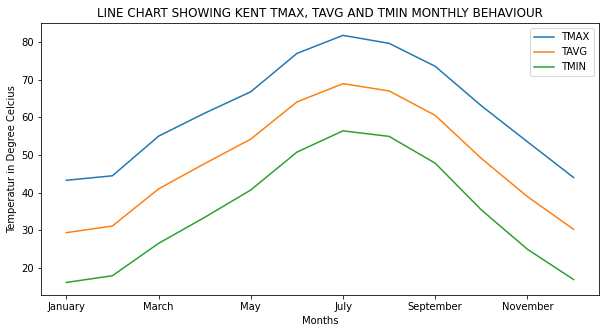

In [52]:
kent_tmax.plot(x='Months', y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING KENT TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

LET'S HANDLE THE TEMPERATURE YEARLY BEHAVIOUR IN KENT

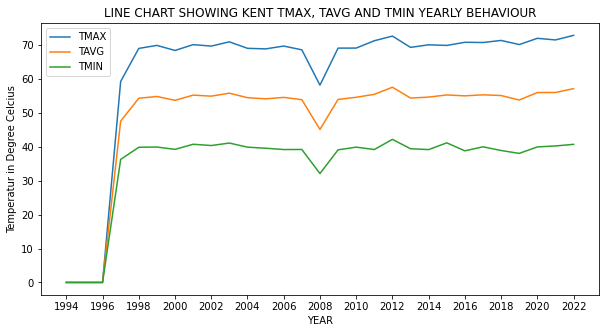

In [53]:
# First group the temperature values according to the year
kent_year_group_tmin = kent2.groupby('YEAR')['TMIN'].mean()
kent_year_group_tmax = kent2.groupby('YEAR')['TMAX'].mean()
kent_year_group_tavg = kent2.groupby('YEAR')['TAVG'].mean()
# Convert each series to dataframe
kent_year_group_tmin = kent_year_group_tmin.to_frame()
kent_year_group_tmax = kent_year_group_tmax.to_frame()
kent_year_group_tavg = kent_year_group_tavg.to_frame()
# Then we merge the three dataframes into one
year_group_kent = pd.merge(kent_year_group_tmin, kent_year_group_tmax, left_index=True, right_index=True)
year_group_kent = pd.merge(year_group_kent, kent_year_group_tavg, left_index=True, right_index=True)

# Then PLOT the yearly behaviour of the temperatur in KENT site
year_group_kent.plot(use_index=True, y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING KENT TMAX, TAVG AND TMIN YEARLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

NOW TO LOOK AT THE PRECIPITATION IN KENT SITE

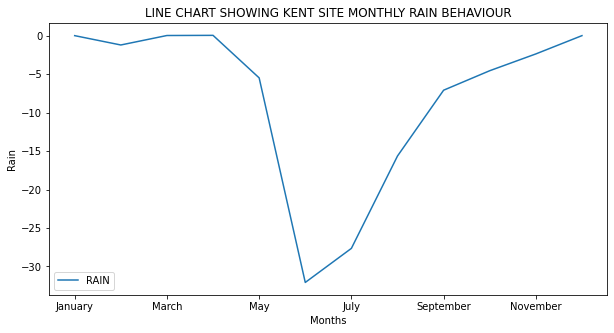

In [54]:
# First I will group the precipitation monthly
kent_month_rain = kent2.groupby('MONTH')['RAIN'].mean()
# Then I will group the precipitation yearly
kent_year_rain = kent2.groupby('YEAR')['RAIN'].mean()
# Convert both series to dataframe
kent_month_rain = kent_month_rain.to_frame()
kent_year_rain = kent_year_rain.to_frame()
# Add a Months column to the kent_month_rain dataframe
kent_month_rain = kent_month_rain.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# PLOT OF KENT MONTHLY RAINFALL OVER THE YEARS
kent_month_rain.plot(x='Months', y='RAIN', figsize=(10,5), title="LINE CHART SHOWING KENT SITE MONTHLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

PLOT OF KENT SITE YEARLY RAIN BEHAVIOUR

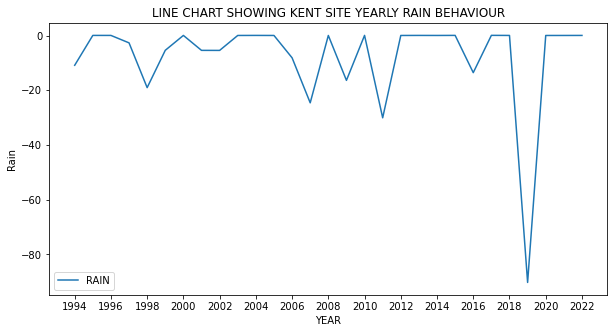

In [55]:
kent_year_rain.plot(use_index=True, y='RAIN', figsize=(10,5), title="LINE CHART SHOWING KENT SITE YEARLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

# NOW LET'S WORK WITH MIAM

In [56]:
# First change all -996.0 values to 0
miam2 = miam_site
miam2['TMAX'] = miam2['TMAX'].replace(-996.00, 0)
miam2['TMIN'] = miam2['TMIN'].replace(-996.00, 0)
miam2['TAVG'] = miam2['TAVG'].replace(-996.00, 0)
miam2['DMAX'] = miam2['DMAX'].replace(-996.00, 0)
miam2['DMIN'] = miam2['DMIN'].replace(-996.00, 0)
miam2['DAVG'] = miam2['DAVG'].replace(-996.00, 0)

# To Group miam site temperature values monthly
miam_tmin = miam2.groupby('MONTH')['TMIN'].mean()
miam_tavg = miam2.groupby('MONTH')['TAVG'].mean()
miam_tmax = miam2.groupby('MONTH')['TMAX'].mean()
# Then convert grouped series to dataframe
miam_tmin = miam_tmin.to_frame()
miam_tavg = miam_tavg.to_frame()
miam_tmax = miam_tmax.to_frame()

# To add TMIN and TAVG to our TMAX dataframe 
tmin = miam_tmin["TMIN"]
miam_tmax = miam_tmax.join(tmin)
tavg = miam_tavg["TAVG"]
miam_tmax = miam_tmax.join(tavg)

# Let us add the months that will be used as our x-axis in our plot
miam_tmax = miam_tmax.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3276115799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miam2['TMAX'] = miam2['TMAX'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3276115799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miam2['TMIN'] = miam2['TMIN'].replace(-996.00, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_23232\3276115799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

NOW WITH OUR KENT DF WE CAN PLOT TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR IN KENT

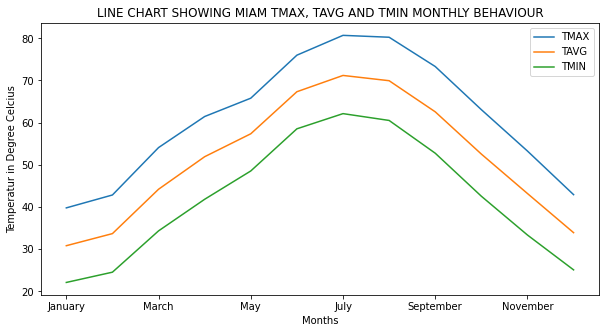

In [57]:
miam_tmax.plot(x='Months', y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING MIAM TMAX, TAVG AND TMIN MONTHLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

LET'S HANDLE THE TEMPERATURE YEARLY BEHAVIOUR IN MIAM

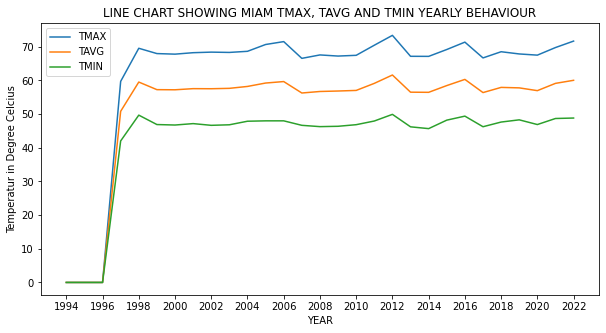

In [58]:
# First group the temperature values according to the year
miam_year_group_tmin = miam2.groupby('YEAR')['TMIN'].mean()
miam_year_group_tmax = miam2.groupby('YEAR')['TMAX'].mean()
miam_year_group_tavg = miam2.groupby('YEAR')['TAVG'].mean()
# Convert each series to dataframe
miam_year_group_tmin = miam_year_group_tmin.to_frame()
miam_year_group_tmax = miam_year_group_tmax.to_frame()
miam_year_group_tavg = miam_year_group_tavg.to_frame()
# Then we merge the three dataframes into one
year_group_miam = pd.merge(miam_year_group_tmin, miam_year_group_tmax, left_index=True, right_index=True)
year_group_miam = pd.merge(year_group_miam, miam_year_group_tavg, left_index=True, right_index=True)

# Then PLOT the yearly behaviour of the temperatur in MIAM site
year_group_miam.plot(use_index=True, y=['TMAX', 'TAVG', 'TMIN'], figsize=(10,5), title="LINE CHART SHOWING MIAM TMAX, TAVG AND TMIN YEARLY BEHAVIOUR")
plt.ylabel('Temperatur in Degree Celcius')
plt.locator_params(axis='x', nbins=20)
plt.show()

NOW TO LOOK AT THE PRECIPITATION IN MIAM SITE

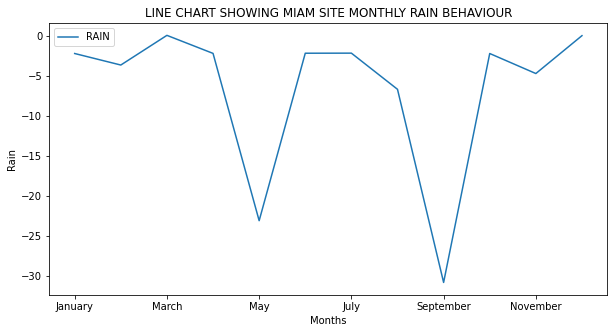

In [59]:
# First I will group the precipitation monthly
miam_month_rain = miam2.groupby('MONTH')['RAIN'].mean()
# Then I will group the precipitation yearly
miam_year_rain = miam2.groupby('YEAR')['RAIN'].mean()
# Convert both series to dataframe
miam_month_rain = miam_month_rain.to_frame()
miam_year_rain = miam_year_rain.to_frame()
# Add a Months column to the miam_month_rain dataframe
miam_month_rain = miam_month_rain.assign(Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# PLOT OF MIAM MONTHLY RAINFALL OVER THE YEARS
miam_month_rain.plot(x='Months', y='RAIN', figsize=(10,5), title="LINE CHART SHOWING MIAM SITE MONTHLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

PLOT OF MIAM SITE YEARLY RAIN BEHAVIOUR

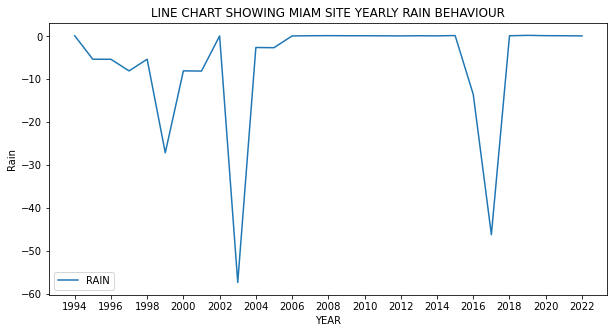

In [60]:
miam_year_rain.plot(use_index=True, y='RAIN', figsize=(10,5), title="LINE CHART SHOWING MIAM SITE YEARLY RAIN BEHAVIOUR")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

## YEARLY RAIN RELATIONSHIP BETWEEN THE 4 SITES

In [61]:
# So I will join the yearly rain data from other sites into a single dataframe
miam_rain_1 = miam_year_rain
holl_rain_1 = holl_year_rain['RAIN']
idab_rain_1 = idab_year_rain['RAIN']
kent_rain_1 = kent_year_rain['RAIN']
miam_rain_1 = miam_rain_1.merge(holl_rain_1, on='YEAR', how='left')
miam_rain_1 = miam_rain_1.join(idab_rain_1)
miam_rain_1 = miam_rain_1.merge(kent_rain_1, on='YEAR', how='left')
print(miam_rain_1)

         RAIN_x      RAIN_y     RAIN_x     RAIN_y
YEAR                                             
1994   0.140795    0.055288   0.157507 -10.871589
1995  -5.345507 -139.483041  -2.632000   0.052384
1996  -5.352705  -59.970847   0.159536   0.048962
1997  -8.063671    0.104301   0.148055  -2.675644
1998  -5.338603 -177.872712   0.115370 -19.043644
1999 -27.149726  -68.351178 -13.565151  -5.394658
2000  -8.057049   -2.651995 -16.216585   0.043743
2001  -8.103288    0.055041  -2.589507  -5.416110
2002   0.088329 -125.846630  -5.337014  -5.431726
2003 -57.388466   -2.695397 -21.776904   0.034137
2004  -2.609208   -2.648415 -43.590847   0.051940
2005  -2.654986    0.063753  -5.401726   0.030384
2006   0.091342 -139.508712   0.120137  -8.141726
2007   0.131507    0.068740   0.119068 -24.598767
2008   0.155792    0.070519 -10.785355   0.034071
2009   0.133644    0.061836 -24.425288 -16.387288
2010   0.132219    0.072301   0.109288   0.064932
2011   0.118082    0.029644   0.104274 -30.078219


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'RAIN_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [64]:
#Changing column name with index number
#df.columns.values[0] = "b"
miam_rain_1.columns.values[0] = 'MIAM'
miam_rain_1.columns.values[1] = 'HOLL'
miam_rain_1.columns.values[2] = 'IDAB'
miam_rain_1.columns.values[3] = 'KENT'

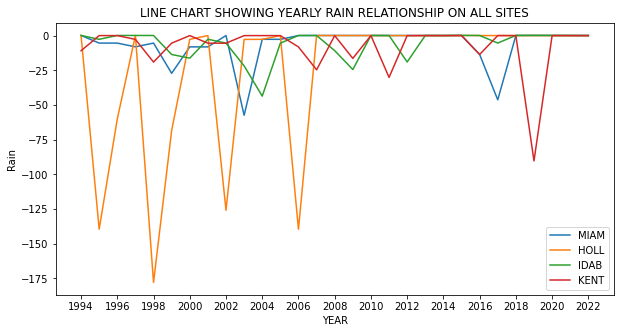

In [65]:
miam_rain_1.plot(use_index=True, y=['MIAM','HOLL', 'IDAB', 'KENT'], figsize=(10,5), title="LINE CHART SHOWING YEARLY RAIN RELATIONSHIP ON ALL SITES")
plt.ylabel('Rain')
plt.locator_params(axis='x', nbins=20)
plt.show()

## PLOT TO SHOW RELATIONSHIP BETWEEN YEARLY TAVG FOR ALL SITES

In [66]:
# Let's merge all the sites TAVG year group into a single dataframe
miam_year_group_tavg

,TAVG
YEAR,
1994,0.000000
1995,0.000000
1996,0.000000
1997,50.805370
1998,59.491233
1999,57.234055
2000,57.194344
2001,57.530712
2002,57.506932


In [67]:
# Joining yearly TAVG for the different sites into one dataframe
miam_year_tavg_1 = miam_year_group_tavg
holl_year_tavg_1 = year_group_tavg['TAVG']
kent_year_tavg_1 = kent_year_group_tavg['TAVG']
idab_year_tavg_1 = idab_year_group_tavg['TAVG']
miam_year_tavg_1 = miam_year_tavg_1.merge(holl_year_tavg_1, on='YEAR', how='left')
miam_year_tavg_1 = miam_year_tavg_1.join(idab_year_tavg_1)
miam_year_tavg_1 = miam_year_tavg_1.merge(kent_year_tavg_1, on='YEAR', how='left')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TAVG_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [69]:
# Naming the columns
miam_year_tavg_1.columns.values[0] = 'MIAM'
miam_year_tavg_1.columns.values[1] = 'HOLL'
miam_year_tavg_1.columns.values[2] = 'IDAB'
miam_year_tavg_1.columns.values[3] = 'KENT'

Text(0, 0.5, 'TAVG in Degree Celcius')

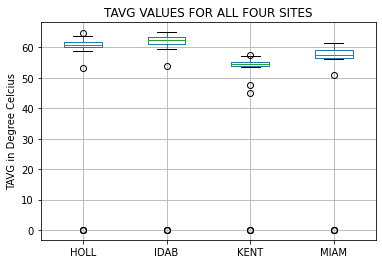

In [79]:
# Boxplot code
boxplot = miam_year_tavg_1.boxplot(column=['HOLL', 'IDAB', 'KENT', 'MIAM'])
title_boxplot = 'TAVG VALUES FOR ALL FOUR SITES'
plt.title( title_boxplot )
plt.ylabel('TAVG in Degree Celcius')

# LINEAR REGRESSION ANALYSIS

### LINEAR REGRESSION MODEL BETWEEN THE MAXIMUM DAILY AIR TEMPERATURE AND THE MAXIMUM DAILY SOIL TEMPERATURE FOR EACH SITE

In [80]:
# First let's import scikitlearn which is used for regression analysis
from sklearn.linear_model import LinearRegression

In [160]:
holl_tmax_only = holl2['TMAX']
holl_smax_only = holl2['SMAX']

In [161]:
# First we have to reshape our data into a numpy array
holl_tmax_only = holl_tmax_only.to_numpy().reshape(-1, 1)
holl_smax_only = holl_smax_only.to_numpy().reshape(-1, 1)

In [162]:
# Linear Regression for HOLL SITE
linear_regressor = LinearRegression()
linear_regressor.fit(holl_tmax_only, holl_smax_only)
holl_smax_prediction = linear_regressor.predict(holl_tmax_only) # This line makes prediction for SMAX

#### Scatter Plot between Daily TMAX and SMAX for HOLL site, Plot also showing Regression model

In [157]:
# I want to replace all "-996" in SMAX column with "0"
holl2['SMAX'].replace(-996, 0, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [159]:
y = []
for x in holl2['SMAX'].to_list():
    if x == -996:
        y.append(x)
        #print(x)
    
        
print(len(y))

0


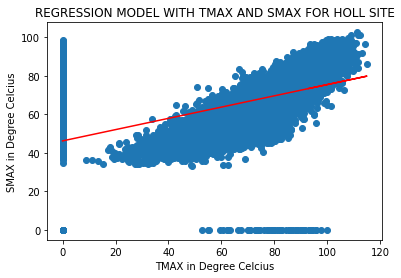

In [167]:
# Scatter plot to show relationship between TMAX and SMAX as well as to show the Regression model
plt.scatter(holl_tmax_only, holl_smax_only)
plt.plot(holl_tmax_only, holl_smax_prediction, color='red')
title_boxplot = 'REGRESSION MODEL WITH TMAX AND SMAX FOR HOLL SITE'
plt.title( title_boxplot)
plt.ylabel('SMAX in Degree Celcius')
plt.xlabel("TMAX in Degree Celcius")
plt.show()

In [166]:
# To get the "R Squared Value"
r_squared = linear_regressor.score(holl_tmax_only, holl_smax_only)
print(f"The R Squared value for HOLL SITE is : {r_squared}")

The R Squared value for HOLL SITE is : 0.2555770134389732


#### Scatter Plot between Daily TMAX and SMAX for IDAB site, Plot also showing Regression model

In [168]:
# I want to replace all "-996" in SMAX column with "0"
idab2['SMAX'].replace(-996, 0, inplace=True)

# Create pandas series for TMAX and SMAX
idab_tmax_only = idab2['TMAX']
idab_smax_only = idab2['SMAX']

# Then we have to reshape our data into a numpy array
idab_tmax_only = idab_tmax_only.to_numpy().reshape(-1, 1)
idab_smax_only = idab_smax_only.to_numpy().reshape(-1, 1)

# Linear Regression for IDAB SITE
linear_regressor = LinearRegression()
linear_regressor.fit(idab_tmax_only, idab_smax_only)
idab_smax_prediction = linear_regressor.predict(idab_tmax_only) # This line makes prediction for SMAX

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


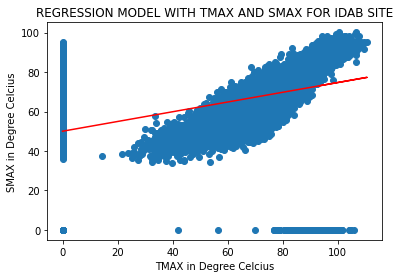

In [169]:
# Scatter plot to show relationship between TMAX and SMAX as well as to show the Regression model
plt.scatter(idab_tmax_only, idab_smax_only)
plt.plot(idab_tmax_only, idab_smax_prediction, color='red')
title_boxplot = 'REGRESSION MODEL WITH TMAX AND SMAX FOR IDAB SITE'
plt.title( title_boxplot)
plt.ylabel('SMAX in Degree Celcius')
plt.xlabel("TMAX in Degree Celcius")
plt.show()

In [170]:
# To get the "R Squared Value"
r_squared = linear_regressor.score(idab_tmax_only, idab_smax_only)
print(f"The R Squared value for IDAB SITE is : {r_squared}")

The R Squared value for IDAB SITE is : 0.15878991100574025


#### Scatter Plot between Daily TMAX and SMAX for KENT site, Plot also showing Regression model

In [172]:
# I want to replace all "-996" in SMAX column with "0"
kent2['SMAX'].replace(-996, 0, inplace=True)

# Create pandas series for TMAX and SMAX
kent_tmax_only = kent2['TMAX']
kent_smax_only = kent2['SMAX']

# Then we have to reshape our data into a numpy array
kent_tmax_only = kent_tmax_only.to_numpy().reshape(-1, 1)
kent_smax_only = kent_smax_only.to_numpy().reshape(-1, 1)

# Linear Regression for KENT SITE
linear_regressor = LinearRegression()
linear_regressor.fit(kent_tmax_only, kent_smax_only)
kent_smax_prediction = linear_regressor.predict(kent_tmax_only) # This line makes prediction for SMAX

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


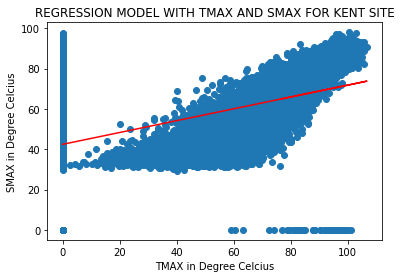

In [173]:
# Scatter plot to show relationship between TMAX and SMAX as well as to show the Regression model
plt.scatter(kent_tmax_only, kent_smax_only)
plt.plot(kent_tmax_only, kent_smax_prediction, color='red')
title_boxplot = 'REGRESSION MODEL WITH TMAX AND SMAX FOR KENT SITE'
plt.title( title_boxplot)
plt.ylabel('SMAX in Degree Celcius')
plt.xlabel("TMAX in Degree Celcius")
plt.show()

In [174]:
# To get the "R Squared Value"
r_squared = linear_regressor.score(kent_tmax_only, kent_smax_only)
print(f"The R Squared value for KENT SITE is : {r_squared}")

The R Squared value for KENT SITE is : 0.20971373066964305


#### Scatter Plot between Daily TMAX and SMAX for MIAM site, Plot also showing Regression model

In [175]:
# I want to replace all "-996" in SMAX column with "0"
miam2['SMAX'].replace(-996, 0, inplace=True)

# Create pandas series for TMAX and SMAX
miam_tmax_only = miam2['TMAX']
miam_smax_only = miam2['SMAX']

# Then we have to reshape our data into a numpy array
miam_tmax_only = miam_tmax_only.to_numpy().reshape(-1, 1)
miam_smax_only = miam_smax_only.to_numpy().reshape(-1, 1)

# Linear Regression for MIAM SITE
linear_regressor = LinearRegression()
linear_regressor.fit(miam_tmax_only, miam_smax_only)
miam_smax_prediction = linear_regressor.predict(miam_tmax_only) # This line makes prediction for SMAX

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


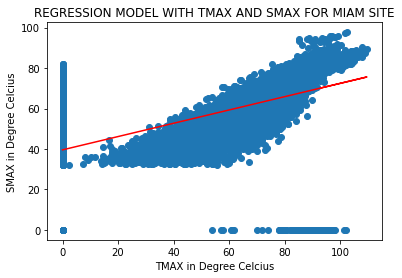

In [176]:
# Scatter plot to show relationship between TMAX and SMAX as well as to show the Regression model
plt.scatter(miam_tmax_only, miam_smax_only)
plt.plot(miam_tmax_only, miam_smax_prediction, color='red')
title_boxplot = 'REGRESSION MODEL WITH TMAX AND SMAX FOR MIAM SITE'
plt.title( title_boxplot)
plt.ylabel('SMAX in Degree Celcius')
plt.xlabel("TMAX in Degree Celcius")
plt.show()

In [177]:
# To get the "R Squared Value"
r_squared = linear_regressor.score(miam_tmax_only, miam_smax_only)
print(f"The R Squared value for MIAM SITE is : {r_squared}")

The R Squared value for MIAM SITE is : 0.2934765493183811
